In [1]:
import os
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import insurance data from csv file

data1 = pd.read_csv("states_insurance.csv")
data1.head()

,State,State (Abb),Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,AL,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,AK,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,AZ,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,AR,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,CA,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [3]:
# Import Population from CSV file

Population = pd.read_csv("Population.csv")
Population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,1,Alabama,4779736,4780131,4785492,4799918,4815960,...,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,40,4,9,2,Alaska,710231,710249,714031,722713,731089,...,-4.391104,-14.126103,-10.691705,-6.200312,0.953545,1.615076,-1.327004,-11.129328,-7.263903,-3.456333
2,40,4,8,4,Arizona,6392017,6392301,6408312,6467163,6549634,...,3.876957,6.150498,7.141761,8.952743,3.026218,7.014014,5.741503,8.292187,9.418981,11.114557
3,40,3,7,5,Arkansas,2915918,2916025,2921995,2939493,2950685,...,-0.428135,-0.966657,-0.323983,0.065369,2.806796,0.722219,0.521547,0.130620,0.843095,1.183352
4,40,4,9,6,California,37253956,37254522,37332685,37676861,38011074,...,-1.356844,-1.068505,-1.998153,-2.786746,2.175030,2.075152,1.837653,2.536460,1.815133,0.857063


In [4]:
# Import only columns that is needed in the data frame

columns_pop = Population.columns.tolist()
columns_pop = [i for i in columns_pop if i in ["POPESTIMATE2010","POPESTIMATE2013","POPESTIMATE2015","POPESTIMATE2016"]]
Population= Population[columns_pop]
Population.dtypes

POPESTIMATE2010    int64
POPESTIMATE2013    int64
POPESTIMATE2015    int64
POPESTIMATE2016    int64
dtype: object

In [5]:
# Join Population and Insurance data

data=data1.join(Population)
data.head()

,State,State (Abb),Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),POPESTIMATE2010,POPESTIMATE2013,POPESTIMATE2015,POPESTIMATE2016
0,Alabama,AL,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,4785492,4829479,4853875,4863300
1,Alaska,AK,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,714031,736879,737709,741894
2,Arizona,AZ,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,6408312,6624617,6817565,6931071
3,Arkansas,AR,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,2921995,2958663,2977853,2988248
4,California,CA,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,37332685,38335203,38993940,39250017


In [6]:
# Check the types of columns

data.dtypes

State                                            object
State (Abb)                                      object
Uninsured Rate (2010)                            object
Uninsured Rate (2015)                            object
Uninsured Rate Change (2010-2015)                object
Health Insurance Coverage Change (2010-2015)      int64
Employer Health Insurance Coverage (2015)         int64
Marketplace Health Insurance Coverage (2016)      int64
Marketplace Tax Credits (2016)                    int64
Average Monthly Tax Credit (2016)                object
State Medicaid Expansion (2016)                    bool
Medicaid Enrollment (2013)                      float64
Medicaid Enrollment (2016)                        int64
Medicaid Enrollment Change (2013-2016)          float64
Medicare Enrollment (2016)                        int64
POPESTIMATE2010                                   int64
POPESTIMATE2013                                   int64
POPESTIMATE2015                                 

In [7]:
# Convert % to float64

data['Uninsured Rate (2010)'] = data['Uninsured Rate (2010)'].replace('%','', regex= True).astype('float')
data['Uninsured Rate (2015)'] = data['Uninsured Rate (2015)'].replace('%', '', regex = True).astype('float')
data['Uninsured Rate Change (2010-2015)'] = data['Uninsured Rate Change (2010-2015)'].replace('%','', regex = True).astype('float')

# Convert $ to int64 

convert_dollar = lambda x: int(x.strip('$'))
data['Average Monthly Tax Credit (2016)'] = data['Average Monthly Tax Credit (2016)'].map(convert_dollar)

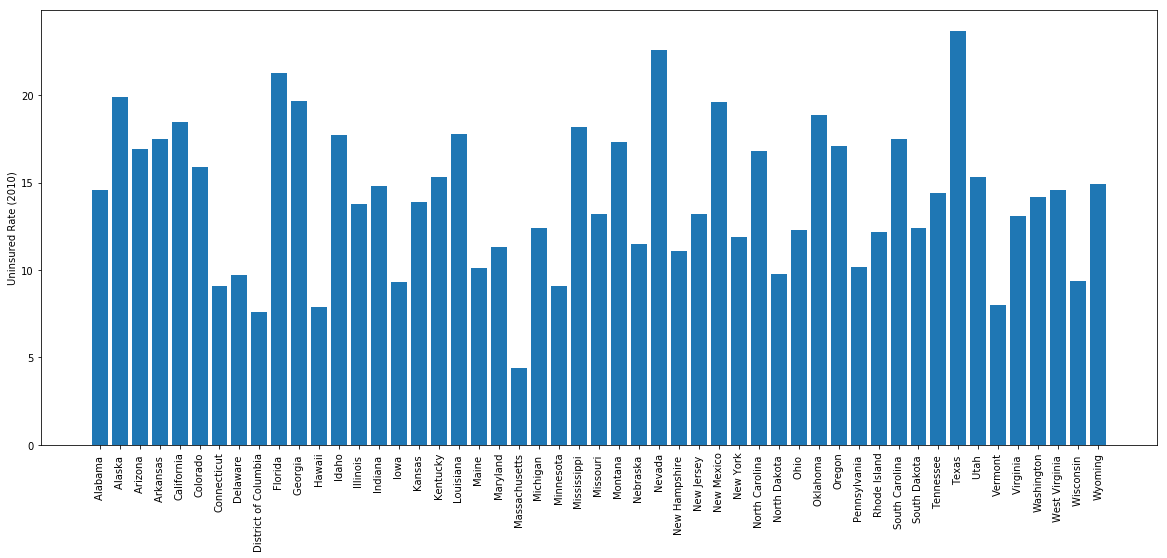

In [8]:
# Bar Graph showing Uninsured rate of different States for year 2010

fig, ax1 = plt.subplots(figsize=(20, 8))
y = data['Uninsured Rate (2010)']
x = range(len(y))
plt.bar(x, y)
ax1.set_xticks(x)
plt.ylabel('Uninsured Rate (2010)')
ax1.set_xticklabels(data['State'], rotation='vertical')
plt.show()

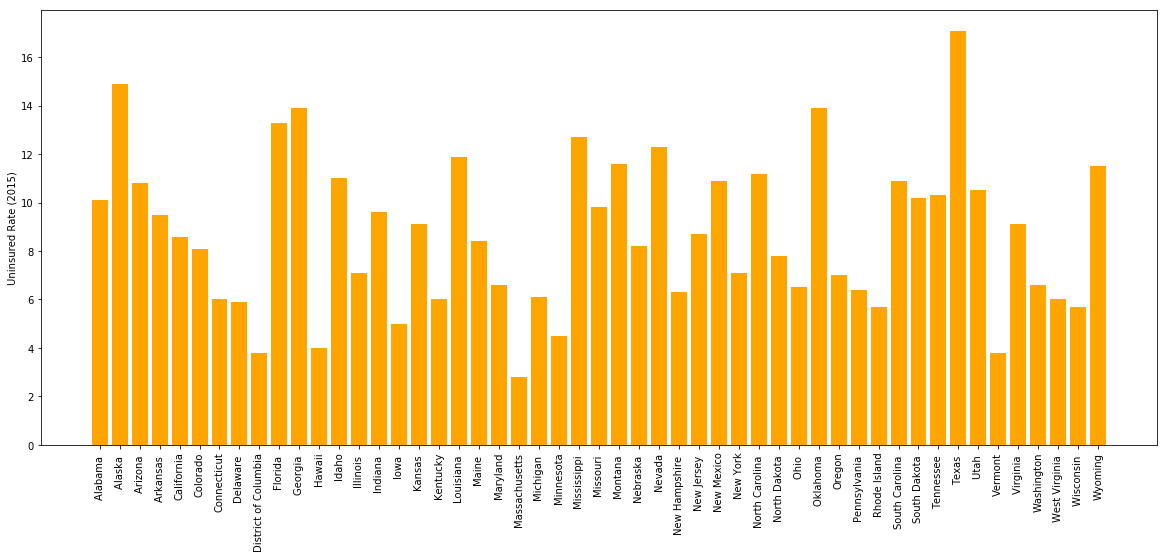

In [9]:
# Bar Graph showing Uninsured rate of different States for year 2015

fig, ax1 = plt.subplots(figsize=(20, 8))
y = data['Uninsured Rate (2015)']
x = range(len(y))
plt.bar(x, y, color='orange')
ax1.set_xticks(x)
plt.ylabel('Uninsured Rate (2015)')
ax1.set_xticklabels(data['State'], rotation='vertical')
plt.show()

In [10]:
# Create a new column for insured rate change (2010-2015)

data['Insured Rate Change (2010-2015)'] = data['Uninsured Rate Change (2010-2015)'].apply(lambda x: x*-1)
data.head()

,State,State (Abb),Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),POPESTIMATE2010,POPESTIMATE2013,POPESTIMATE2015,POPESTIMATE2016,Insured Rate Change (2010-2015)
0,Alabama,AL,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,4785492,4829479,4853875,4863300,4.5
1,Alaska,AK,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,714031,736879,737709,741894,5.0
2,Arizona,AZ,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,6408312,6624617,6817565,6931071,6.1
3,Arkansas,AR,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,2921995,2958663,2977853,2988248,8.0
4,California,CA,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,37332685,38335203,38993940,39250017,9.9


In [11]:
# Create a new column for Medicaid Expansion, if states have expanded medicaid or not

def convert_bool(bool):
        if bool == True:
            bool = 'Yes'
        elif bool == False:
            bool = 'No'
        return bool

MedicaidExpansion = data['State Medicaid Expansion (2016)']
data['MedicaidExpansion'] = MedicaidExpansion.apply(convert_bool)

In [12]:
data.head()

,State,State (Abb),Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),...,Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),POPESTIMATE2010,POPESTIMATE2013,POPESTIMATE2015,POPESTIMATE2016,Insured Rate Change (2010-2015),MedicaidExpansion
0,Alabama,AL,14.6,10.1,-4.5,215000,2545000,165534,152206,310,...,799176.0,910775,111599.0,989855,4785492,4829479,4853875,4863300,4.5,No
1,Alaska,AK,19.9,14.9,-5.0,36000,390000,17995,16205,750,...,122334.0,166625,44291.0,88966,714031,736879,737709,741894,5.0,Yes
2,Arizona,AZ,16.9,10.8,-6.1,410000,3288000,179445,124346,230,...,1201770.0,1716198,514428.0,1175624,6408312,6624617,6817565,6931071,6.1,Yes
3,Arkansas,AR,17.5,9.5,-8.0,234000,1365000,63357,56843,306,...,556851.0,920194,363343.0,606146,2921995,2958663,2977853,2988248,8.0,Yes
4,California,CA,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,...,7755381.0,11843081,4087700.0,5829777,37332685,38335203,38993940,39250017,9.9,Yes


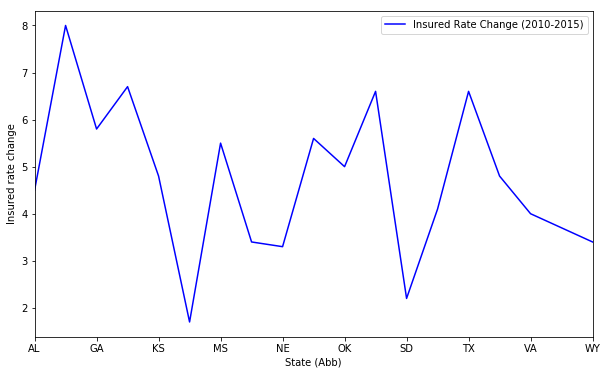

In [13]:
# Insured rate of states which have no medicaid expansion (2010-2015)

expansion_No=data[['State (Abb)','MedicaidExpansion', 'Insured Rate Change (2010-2015)']]
expansion_No_filtered = expansion_No[(expansion_No.MedicaidExpansion == 'No')]
expansion_No_filtered.plot('State (Abb)', 'Insured Rate Change (2010-2015)', figsize= (10,6),color='blue')
plt.ylabel('Insured rate change')
plt.show()

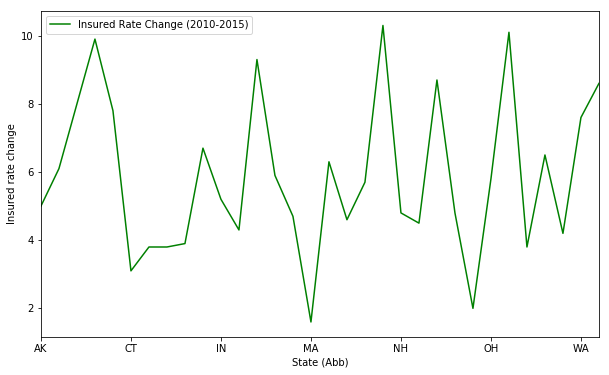

In [14]:
# Insured rate of states which have medicaid expansion (2010-2015)

expansion_yes=data[['State (Abb)','MedicaidExpansion', 'Insured Rate Change (2010-2015)']]
expansion_yes_filtered = expansion_yes[(expansion_yes.MedicaidExpansion == 'Yes')]
expansion_yes_filtered.plot('State (Abb)', 'Insured Rate Change (2010-2015)', figsize= (10,6),color='green')
plt.ylabel('Insured rate change')
plt.show()

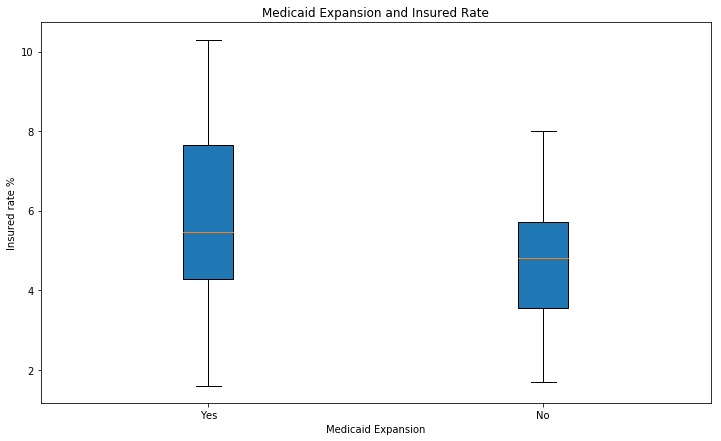

In [15]:
# Create boxplot for medical expansion to see if medical expansion affect the increase in rate of insurance.

boxplot = plt.figure(1, figsize=(12, 7))
size = boxplot.add_subplot(111)
medicaid_expansion= [expansion_yes_filtered['Insured Rate Change (2010-2015)'],expansion_No_filtered['Insured Rate Change (2010-2015)']]
bp = size.boxplot(medicaid_expansion, patch_artist=True)
plt.xlabel('Medicaid Expansion')
plt.ylabel('Insured rate %')
plt.title('Medicaid Expansion and Insured Rate')
size.set_xticklabels(['Yes', 'No'])
plt.show()

In [16]:
# Summary of medicaid expansion  

print(expansion_yes_filtered['Insured Rate Change (2010-2015)'].describe())
print(expansion_No_filtered['Insured Rate Change (2010-2015)'].describe())

# Out of 51 States 32 states have expanded Medicaid programs and 19 States are without Medicaid Programs

count    32.000000
mean      5.856250
std       2.305804
min       1.600000
25%       4.275000
50%       5.450000
75%       7.650000
max      10.300000
Name: Insured Rate Change (2010-2015), dtype: float64
count    19.000000
mean      4.721053
std       1.621926
min       1.700000
25%       3.550000
50%       4.800000
75%       5.700000
max       8.000000
Name: Insured Rate Change (2010-2015), dtype: float64


In [17]:
#Checking if there is any null values

data.isnull().any()

State                                           False
State (Abb)                                     False
Uninsured Rate (2010)                           False
Uninsured Rate (2015)                           False
Uninsured Rate Change (2010-2015)               False
Health Insurance Coverage Change (2010-2015)    False
Employer Health Insurance Coverage (2015)       False
Marketplace Health Insurance Coverage (2016)    False
Marketplace Tax Credits (2016)                  False
Average Monthly Tax Credit (2016)               False
State Medicaid Expansion (2016)                 False
Medicaid Enrollment (2013)                       True
Medicaid Enrollment (2016)                      False
Medicaid Enrollment Change (2013-2016)           True
Medicare Enrollment (2016)                      False
POPESTIMATE2010                                 False
POPESTIMATE2013                                 False
POPESTIMATE2015                                 False
POPESTIMATE2016             

In [18]:
# we have a missing values in columns Medicaid Enrollment (2013) and Medicaid Enrollment Change (2013-2016)
# To fill up the missing values we take the average of the medicaid enrollemnt in 2013 

data['Medicaid Enrollment (2013)'].mean()
data=data.fillna(data['Medicaid Enrollment (2013)'].mean())

data['Medicaid Enrollment Change (2013-2016)'].mean()
data=data.fillna(data['Medicaid Enrollment Change (2013-2016)'].mean())

In [19]:
# checking if NA's is fill with the average 
# there is no missing values now
data.isnull().any()

State                                           False
State (Abb)                                     False
Uninsured Rate (2010)                           False
Uninsured Rate (2015)                           False
Uninsured Rate Change (2010-2015)               False
Health Insurance Coverage Change (2010-2015)    False
Employer Health Insurance Coverage (2015)       False
Marketplace Health Insurance Coverage (2016)    False
Marketplace Tax Credits (2016)                  False
Average Monthly Tax Credit (2016)               False
State Medicaid Expansion (2016)                 False
Medicaid Enrollment (2013)                      False
Medicaid Enrollment (2016)                      False
Medicaid Enrollment Change (2013-2016)          False
Medicare Enrollment (2016)                      False
POPESTIMATE2010                                 False
POPESTIMATE2013                                 False
POPESTIMATE2015                                 False
POPESTIMATE2016             

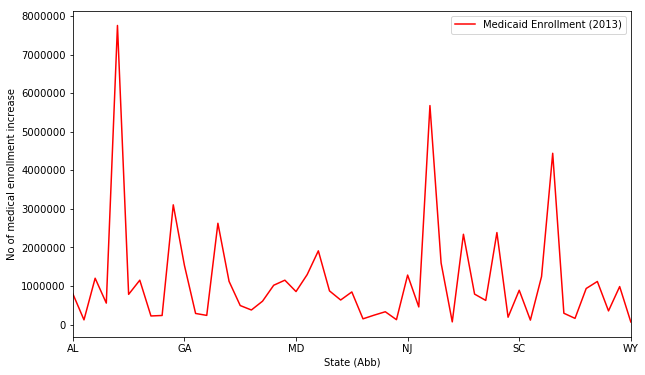

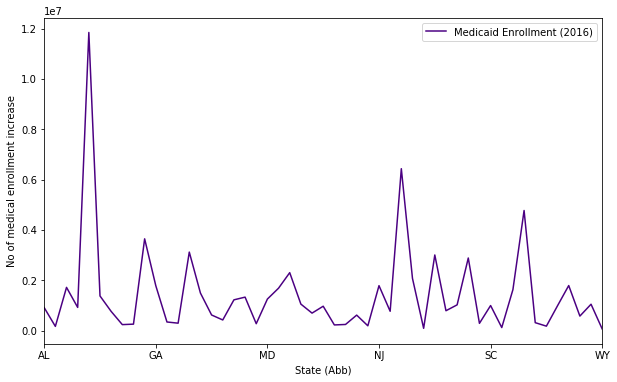

In [20]:
# Number of Medicaid Enrollemnt Change from 2013 to 2016

data.plot('State (Abb)', 'Medicaid Enrollment (2013)',figsize= (10,6), color='red')
plt.ylabel('No of medical enrollment increase')
data.plot('State (Abb)', 'Medicaid Enrollment (2016)', figsize= (10,6),color='indigo')
plt.ylabel('No of medical enrollment increase')
plt.show()

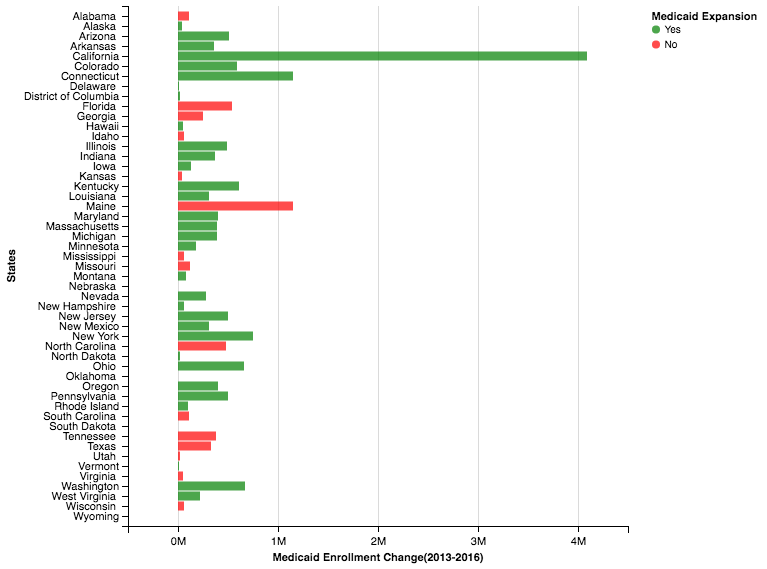

In [21]:
# Highest Medicaid Enrollment Change of States 

EnrollmentChange_State = alt.Chart(data).mark_bar().encode(
    color = alt.Color('MedicaidExpansion', 
    legend=alt.Legend(title='Medicaid Expansion'),
    scale=alt.Scale(domain=['Yes', 'No'],
               range=["green", "red"])),
    x= alt.X('Medicaid Enrollment Change (2013-2016)', axis=alt.Axis(title='Medicaid Enrollment Change(2013-2016)'),),
    y= alt.Y('State', axis=alt.Axis(title='States'),
        scale=alt.Scale(bandSize=10),
        
       ))

EnrollmentChange_State

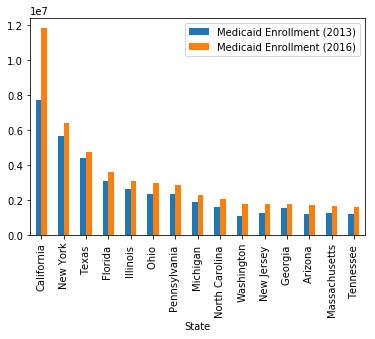

In [22]:
# Top ten States which has highest medicaid enrollment in 2013-2016

plt.figure(figsize = (12,9))
top_10 = data.nlargest(15,'Medicaid Enrollment (2016)')
top_10.set_index("State", inplace=True)
top_10[['Medicaid Enrollment (2013)','Medicaid Enrollment (2016)']].plot(kind = 'bar')
plt.show()

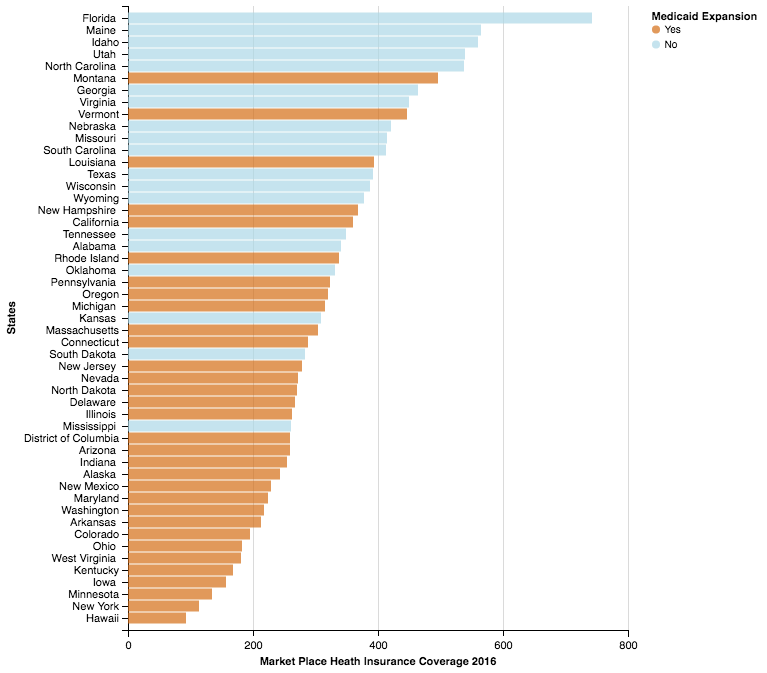

In [23]:
# Per Capita Market place Health Insurance coverage of different States (per 10000)

data['Marketplace Health Insurance Coverage per 10000 (2016)'] = (data['Marketplace Health Insurance Coverage (2016)']/data['POPESTIMATE2016'])*10000

# Number of people insured by Market Place Health Insurance

Marketplace_Coverage = alt.Chart(data).mark_bar().encode(
    color = alt.Color('MedicaidExpansion', 
    legend=alt.Legend(title='Medicaid Expansion'),
    scale=alt.Scale(domain=['Yes', 'No'],
               range=["#D56D15", "lightblue"])),
    x= alt.X('Marketplace Health Insurance Coverage per 10000 (2016)', axis=alt.Axis(title='Market Place Heath Insurance Coverage 2016'),),
    y= alt.Y('State', axis=alt.Axis(title='States'),
        scale=alt.Scale(bandSize=12),
        sort=alt.SortField(field = 'Marketplace Health Insurance Coverage per 10000 (2016)',op ='sum',order='descending',),
       ))

Marketplace_Coverage 

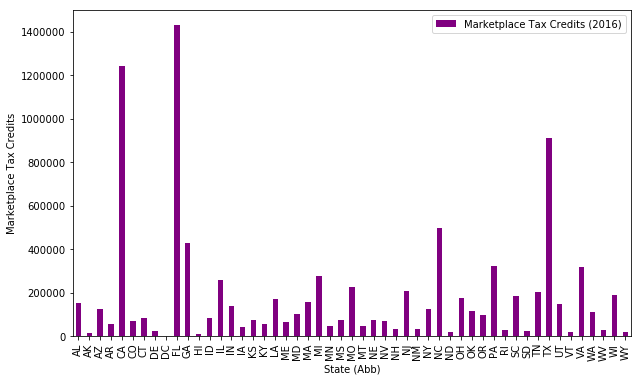

In [24]:
# Marketplace tax credits of the states

data.plot.bar('State (Abb)', "Marketplace Tax Credits (2016)", figsize= (10,6),color = 'Purple')
plt.ylabel('Marketplace Tax Credits')
plt.show()

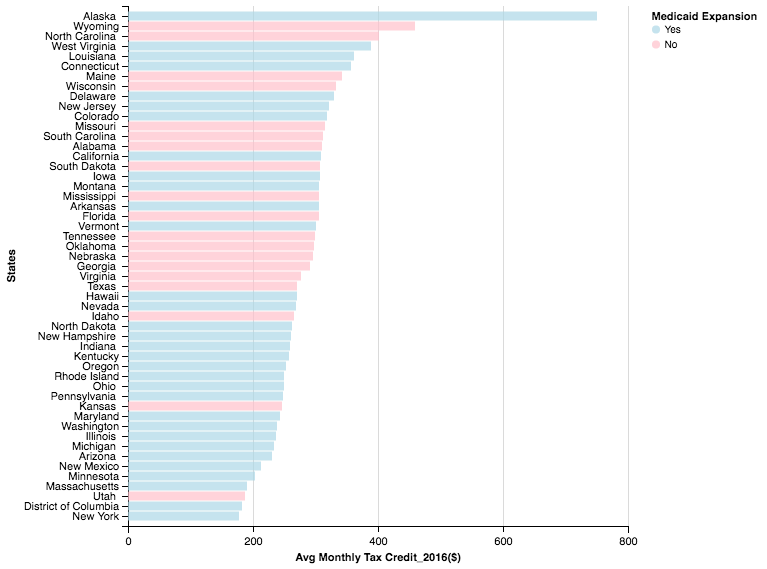

In [25]:
# Average monthly Tax credit for States 

Average_taxcredit = alt.Chart(data).mark_bar().encode(
    color = alt.Color('MedicaidExpansion', 
    legend=alt.Legend(title='Medicaid Expansion'),
    scale=alt.Scale(domain=['Yes', 'No'],
        range=["lightblue", "pink"])),
    x= alt.X('Average Monthly Tax Credit (2016)', axis=alt.Axis(title='Avg Monthly Tax Credit_2016($)'),),
    y= alt.Y('State', axis=alt.Axis(title='States'),
        scale=alt.Scale(bandSize=10),
        sort=alt.SortField(field = 'Average Monthly Tax Credit (2016)',op ='sum',order='descending',),
       ))

Average_taxcredit

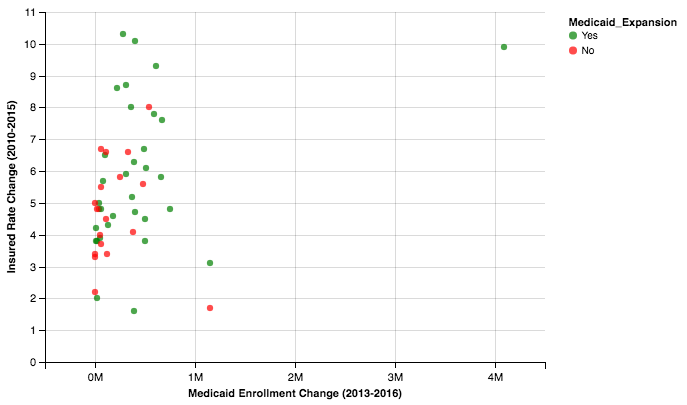

In [26]:
# Medicaid Enrollment change from (2013-2016) and Insured Rate Change

Enrollment_Change = alt.Chart(data).mark_point(filled=True).encode(
    color = alt.Color('MedicaidExpansion', 
    legend = alt.Legend(title = "Medicaid_Expansion"), 
    scale = alt.Scale(domain=['Yes','No'],
        range=['green','red'])),
    x = alt.X('Medicaid Enrollment Change (2013-2016)',axis= alt.Axis(Title="Medicaid Enrollment Change (2013-2016)")),
    y = alt.Y('Insured Rate Change (2010-2015)', axis= alt.Axis(Title="Insured Rate Change (2010-2015)")))
        
    
Enrollment_Change

In [27]:
# Add a column for increase in number of people insured

data["Number of People Insured (2010-2015)"] =((data["Insured Rate Change (2010-2015)"]/100)*data["POPESTIMATE2015"])
data.head()

,State,State (Abb),Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),...,Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),POPESTIMATE2010,POPESTIMATE2013,POPESTIMATE2015,POPESTIMATE2016,Insured Rate Change (2010-2015),MedicaidExpansion,Marketplace Health Insurance Coverage per 10000 (2016),Number of People Insured (2010-2015)
0,Alabama,AL,14.6,10.1,-4.5,215000,2545000,165534,152206,310,...,111599.0,989855,4785492,4829479,4853875,4863300,4.5,No,340.373820,218424.375
1,Alaska,AK,19.9,14.9,-5.0,36000,390000,17995,16205,750,...,44291.0,88966,714031,736879,737709,741894,5.0,Yes,242.554866,36885.450
2,Arizona,AZ,16.9,10.8,-6.1,410000,3288000,179445,124346,230,...,514428.0,1175624,6408312,6624617,6817565,6931071,6.1,Yes,258.899382,415871.465
3,Arkansas,AR,17.5,9.5,-8.0,234000,1365000,63357,56843,306,...,363343.0,606146,2921995,2958663,2977853,2988248,8.0,Yes,212.020555,238228.240
4,California,CA,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,...,4087700.0,5829777,37332685,38335203,38993940,39250017,9.9,Yes,360.618443,3860400.060


In [28]:
# Estimate Population of US in 2016

TotalPopulation_State = data.sum ()["POPESTIMATE2016"]
TotalPopulation_State

323127513

In [29]:
# Total number of People insured 

TotalPeople_Insured2010_2015 = data.sum()['Number of People Insured (2010-2015)']
TotalPeople_Insured2010_2015

19853519.957999993

In [30]:
# Use Plotly to show which States has the highest insured rate and that states has medicaid expansion or not

import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
py.sign_in('RichaJoshi','hPvvkFpTHjgabNLYq5LF')
plotly.offline.init_notebook_mode()
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

scale = [[0.0, 'rgb(242,240,247)'],
         [0.2, 'rgb(218,218,235)'],
         [0.4, 'rgb(188,189,220)'],
         [0.6, 'rgb(158,154,200)'],
         [0.8, 'rgb(117,107,177)'],
         [1.0, 'rgb(84,39,143)']]



data = [dict(type='choropleth',colorscale = False,
                 
                 locations=data['State (Abb)'],
                 z= data['Insured Rate Change (2010-2015)'],
                 locationmode='USA-states',
                 text=data['MedicaidExpansion'],
                 marker=dict(line=dict(color='rgb(255,255,255)',
                             width=2)),
                 colorbar=dict(title='% Change in insured rate 2010-2015'))]


layout= dict(title = 'Insured Rate Change: 2010-2015',
             geo = dict(
                 scope='usa',
                 projection=dict( type='albers usa' ),
                 showlakes = True,
                 lakecolor='rgb(95,145,237)'))
    
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='d3-cloropleth-map')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
